This notebook maps back from rgb image to height

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
height_df = pd.read_csv("height.csv",header=None)
height_df

,0
0,0.994892
1,0.613472
2,0.741804
3,0.635291
4,0.475018
5,0.672688
6,0.868175
7,0.602864
8,0.526977
9,0.589624


In [23]:
df = pd.read_excel('input.xlsx')
df.replace('<null>', np.nan, inplace=True)
df['height'] = df['height'].astype(float)
df['greyscale'] = df['greyscale'].astype(float)
df = df.dropna()
df

,height,greyscale
0,9.0,0.423176
1,9.0,0.423176
2,10.0,0.453389
3,9.0,0.423176
4,11.0,0.481010
...,...,...
2801,6.0,0.312177
2802,8.0,0.389947
2803,10.0,0.453389
2804,9.0,0.423176


<AxesSubplot: xlabel='height', ylabel='greyscale'>

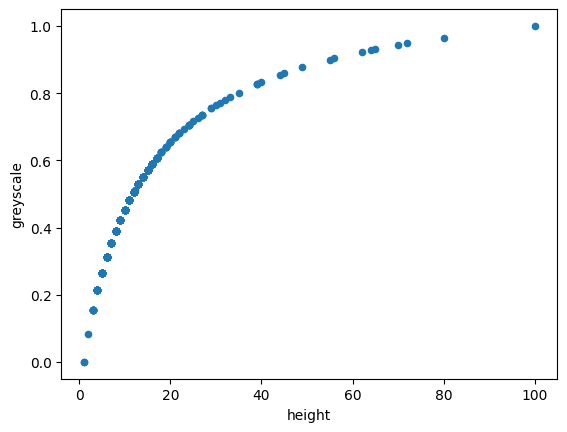

In [24]:
df.plot(x='height', y='greyscale', kind='scatter')

0     0.994892
1     0.613472
2     0.741804
3     0.635291
4     0.475018
5     0.672688
6     0.868175
7     0.602864
8     0.526977
9     0.589624
10    0.735587
11    0.637758
12    0.652345
13    0.845916
14    0.590366
15    0.771821
Name: 0, dtype: float64
[95.70801719 17.35780838 27.30582328 18.70335181 10.76062517 21.27956574
 47.07632855 16.73964627 12.89434129 15.99841179 26.67533368 18.86215476
 19.83192796 42.28103609 16.03910479 30.6779001 ]


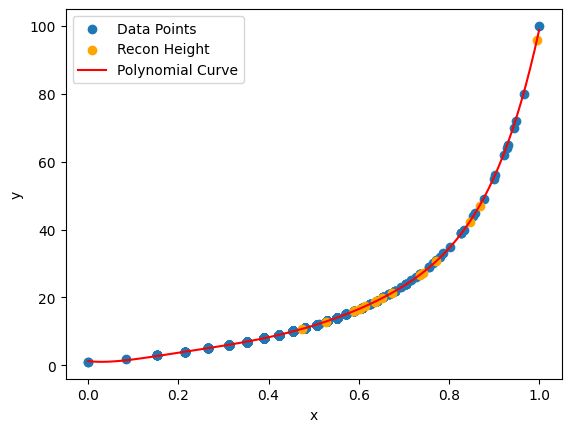

In [51]:
y = df['height']
x = df['greyscale']
# Fit a polynomial curve of degree 2
degree = 6
coefficients = np.polyfit(x, y, degree)
poly = np.poly1d(coefficients)

# Generate x values for the curve
x_curve = np.linspace(x.min(), x.max(), 100)

# Calculate y values for the curve
y_curve = poly(x_curve)

# reconstructed height 
x_height = height_df[0]
y_height = poly(x_height)
print(x_height)
print(y_height)
# Plot the original points and the fitted curve
plt.scatter(x, y, label='Data Points')
plt.scatter(x_height, y_height, label='Recon Height', color = 'orange')
plt.plot(x_curve, y_curve, color='r', label='Polynomial Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [52]:
height_df

,0
0,0.994892
1,0.613472
2,0.741804
3,0.635291
4,0.475018
5,0.672688
6,0.868175
7,0.602864
8,0.526977
9,0.589624


In [53]:
height_df['height']=y_height
height_df

,0,height
0,0.994892,95.708017
1,0.613472,17.357808
2,0.741804,27.305823
3,0.635291,18.703352
4,0.475018,10.760625
5,0.672688,21.279566
6,0.868175,47.076329
7,0.602864,16.739646
8,0.526977,12.894341
9,0.589624,15.998412


In [54]:
height_df.to_csv('height_new.csv')